In [4]:
#Import required modules

from sklearn.metrics import auc, roc_curve, precision_recall_curve, average_precision_score, f1_score
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [1]:
#Load confusion matrix file 
dtype="250g_self"

file_name = "~/github/outputs/confusion_matrix"+dtype+".txt"

cmat = pd.read_csv(file_name, delimiter = "\t")

fpr=dict()
tpr=dict()
roc_auc=dict()

precision = dict()
recall = dict()
f1_precision = dict()
average_precision = dict()

tools=['MageckMLE','Mageck','PBNPA','CB2']

for i in range(4):
    print(i)
    fpr[i], tpr[i], _ = roc_curve(cmat.iloc[:,1].tolist(), cmat.iloc[:,i+2].tolist())
    precision[i], recall[i], _ = precision_recall_curve(cmat.iloc[:,1].tolist(), cmat.iloc[:,i+2].tolist())
    roc_auc[i] = auc(fpr[i], tpr[i])
    #f1_precision[i] = f1_score(cmat.iloc[:,1].tolist(), cmat.iloc[:,i+2].tolist())
    average_precision[i] = average_precision_score(cmat.iloc[:,1].tolist(), cmat.iloc[:,i+2].tolist())

#print(cmat.iloc[:,2])

NameError: name 'pd' is not defined

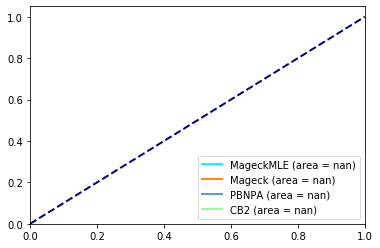

In [18]:
#Plot ROC curve of all tools for comparison

fig = plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue','palegreen']
lw = 2

for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(tools[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#fig.savefig("cm_plots/"+dtype+"_auroc.png")



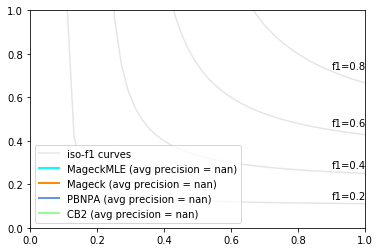

In [19]:
#Plot PRC curve of all tools for comparison

plt.figure()

colors = ['aqua', 'darkorange', 'cornflowerblue','palegreen']
lw = 2
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
    
    
for i, color in zip(range(4), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('{0} (avg precision = {1:0.2f})'
                 ''.format(tools[i], average_precision[i]))
    #labels.append('{0} (F1 = {1:0.2f})'
    #              ''.format(tools[i], f1_precision[i]))
    
fig = plt.gcf()
#fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
#plt.xlabel('Recall')
#plt.ylabel('Precision')
plt.legend(lines, labels, loc="lower left")


plt.show()

#fig.savefig("cm_plots/"+dtype+"_prc.png")
